#Question 1

##Initials

In [54]:
import joblib
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import itertools

In [55]:
if os.path.exists('data_banknote_authentication.txt'):
    print("Already Present")
else:
    os.system("wget https://www.dropbox.com/s/wswyatu5mjh6hy0/data_banknote_authentication.txt")

Already Present


In [56]:
columns=['variance','skewness','curtosis','entropy','classes']
df = pd.read_csv('data_banknote_authentication.txt',names=columns)

In [57]:
df

,variance,skewness,curtosis,entropy,classes
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


#Part 1

In [58]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
classes     0
dtype: int64

In [59]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
classes       int64
dtype: object

In [60]:
df.describe()

,variance,skewness,curtosis,entropy,classes
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


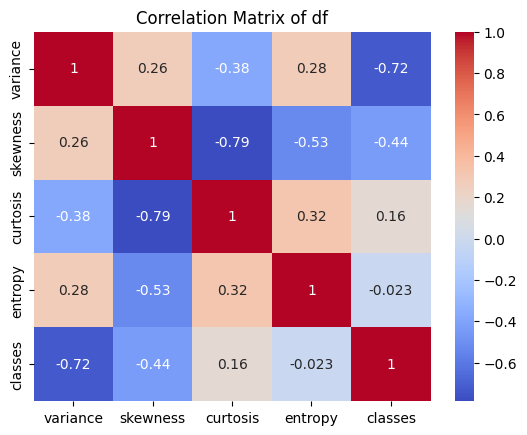

In [61]:
corr_mat = df.corr()

# plotting
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of df')
plt.show()

In [62]:
for i in df.columns:
    print(len(np.unique(df[i])))

1338
1256
1270
1156
2


In [63]:
#Scalling the dataset
scaler = MinMaxScaler()
for col in df.columns:
    if(col!='classes'):
        df[col] = scaler.fit_transform(np.array(df[col]).reshape(len(df[col]),1))

In [64]:
#df to X,y
X=df.drop('classes',axis=1)
y=df['classes']

In [65]:
#Splitting dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.7, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

##Part 2

In [66]:
c_vals = [0.0001, 0.01, 1, 100, 1000, 10000]
for C in c_vals:
    svm_clf = SVC(C=C, random_state=42)
    svm_clf.fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Classification accuracy for C = {:>6}: {:.4f}".format(C, accuracy))

Classification accuracy for C = 0.0001: 0.5876
Classification accuracy for C =   0.01: 0.8978
Classification accuracy for C =      1: 1.0000
Classification accuracy for C =    100: 1.0000
Classification accuracy for C =   1000: 1.0000
Classification accuracy for C =  10000: 1.0000


Classification accuracy for C = 0.0001: 0.5876
Classification accuracy for C =   0.01: 0.7226
Classification accuracy for C =      1: 0.8759
Classification accuracy for C =    100: 0.8540
Classification accuracy for C =   1000: 0.8540
Classification accuracy for C =  10000: 0.8540


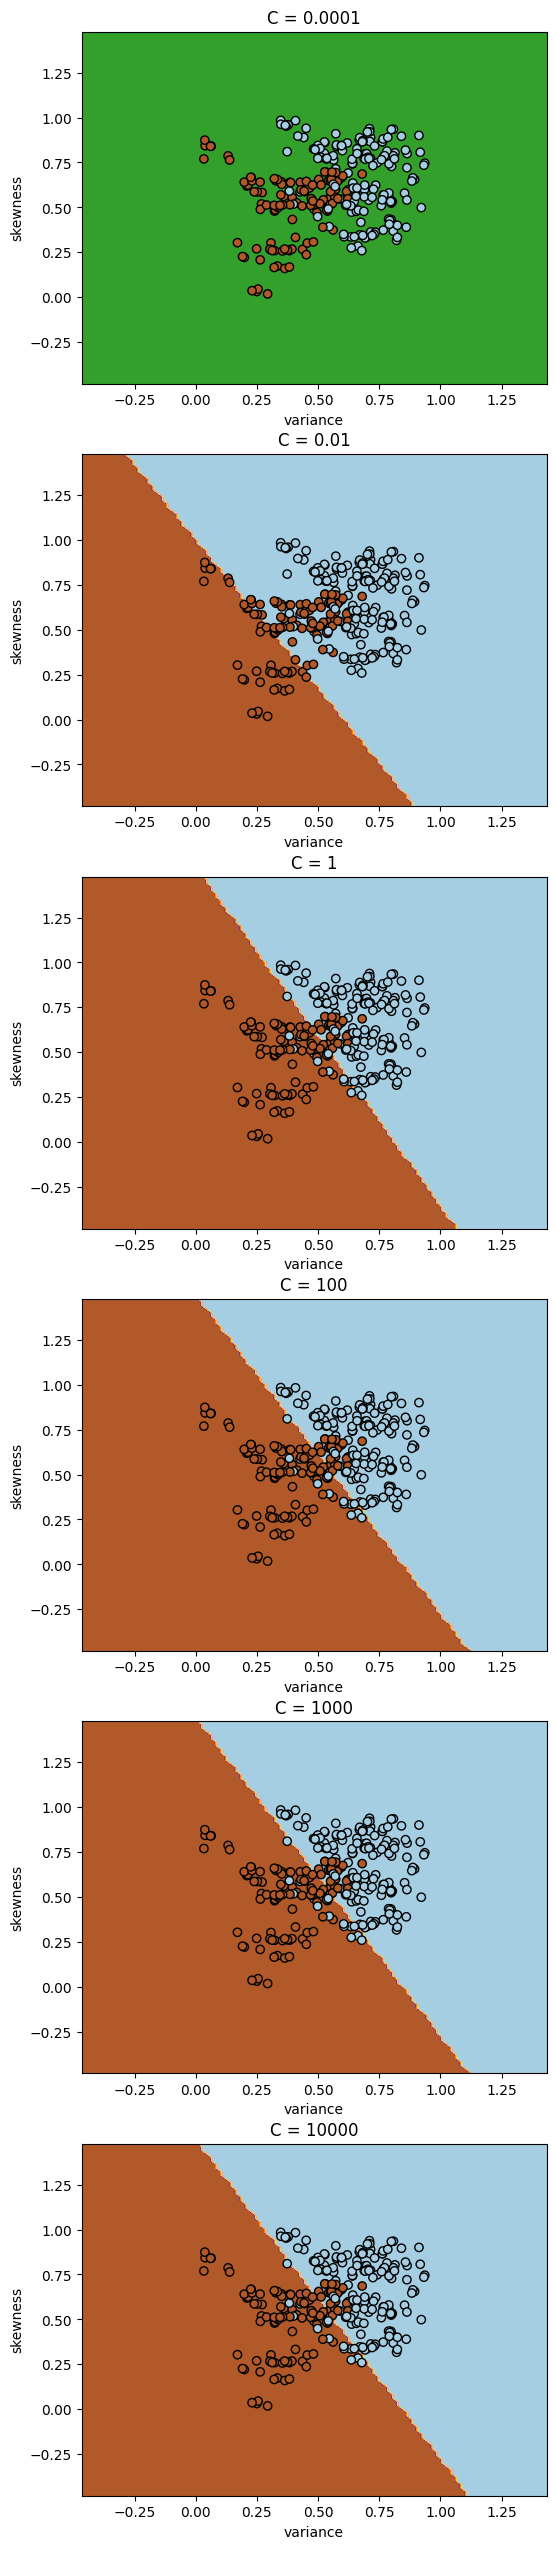

In [67]:
#Features with best corr with y
feature1 = "variance"
feature2 = "skewness"

# Plotting decision boundaries for different values of C
fig, axes = plt.subplots(len(c_vals), 1, figsize=(len(c_vals), 8*4))

for j, C in enumerate(c_vals):
    # Train SVM classifier
    clf = SVC(kernel='linear', C=C)
    clf.fit(X.values[:, [X_train.columns.get_loc(feature1), X_train.columns.get_loc(feature2)]], y.values)

    # Plotting decision boundary
    xx, yy = np.meshgrid(np.arange(X_test[feature1].min()-0.5, X_test[feature1].max()+0.5, 0.02),
                         np.arange(X_test[feature2].min()-0.5, X_test[feature2].max()+0.5, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axes[j].contourf(xx, yy, Z, cmap=plt.cm.Paired)

    # Plotting data points
    axes[j].scatter(X_test[feature1], X_test[feature2], c=y_test, cmap=plt.cm.Paired, edgecolors='k')
    axes[j].set_xlabel(feature1)
    axes[j].set_ylabel(feature2)
    axes[j].set_title(f"C = {C}")

    # Printing classification accuracy
    accuracy = clf.score(X_test.values[:, [X_test.columns.get_loc(feature1), X_test.columns.get_loc(feature2)]], y_test.values)
    print("Classification accuracy for C = {:>6}: {:.4f}".format(C, accuracy))

plt.show()

##Part 3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Classification accuracy for linear kernel: 0.8759


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Classification accuracy for poly kernel: 0.9270
Classification accuracy for rbf kernel: 0.9234


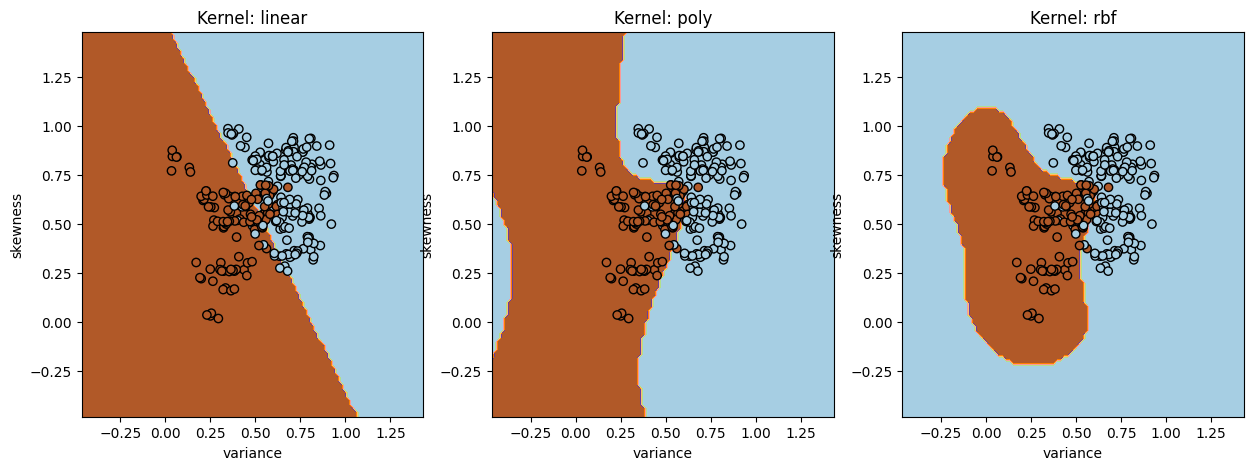

In [68]:
# Features with best corr with y
feature1 = "variance"
feature2 = "skewness"

# Train SVM with different kernels
kernels = ['linear', 'poly', 'rbf']
fig, axes = plt.subplots(1, len(kernels), figsize=(15, 5))

for i, kernel in enumerate(kernels):
    if kernel == 'poly':
        svm_clf = SVC(kernel=kernel, degree=4, random_state=42)  # Quadratic kernel
    else:
        svm_clf = SVC(kernel=kernel, random_state=42)
    svm_clf.fit(X.values[:, [X_train.columns.get_loc(feature1), X_train.columns.get_loc(feature2)]], y.values)

    # Plot decision boundary
    xx, yy = np.meshgrid(np.arange(X_test[feature1].min()-0.5, X_test[feature1].max()+0.5, 0.02),
                         np.arange(X_test[feature2].min()-0.5, X_test[feature2].max()+0.5, 0.02))
    Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axes[i].contourf(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot data points
    axes[i].scatter(X_test[feature1], X_test[feature2], c=y_test, cmap=plt.cm.Paired, edgecolors='k')
    axes[i].set_xlabel(feature1)
    axes[i].set_ylabel(feature2)
    axes[i].set_title(f"Kernel: {kernel}")

    # Print classification accuracy
    accuracy = svm_clf.score(X_test[[feature1, feature2]], y_test)
    print(f"Classification accuracy for {kernel} kernel: {accuracy:.4f}")

plt.show()